In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline


In [5]:
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")

In [6]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [7]:
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [9]:
#Create new variable: discount_percent¶
df["discount_percent"] = ((df.retail_price - df.discounted_price)*100)/df.retail_price
df.discount_percent.head()

0    62.062062
1    29.576764
2    50.050050
3    61.802575
4     4.545455
Name: discount_percent, dtype: float64

In [10]:
#Create a function to extract nth level of product category from the product category tree
#The product categories are stored in the variable "product_category_tree". The following function is used to extract the product categories at a specified level in the tree.
def get_nth_category(dataframe, level=1):
    """extract the level-n product category from the product category tree"""
    
    if level == 1:
        category = dataframe.product_category_tree.apply(lambda x: re.split(" >> ", x)[0]).str[2:]
    else:
        category = dataframe.product_category_tree.apply(lambda x: re.split(" >> ", x)[level:(level+1)])
    
    category = category.replace("[]", "[EMPTY_LEVEL]")  # this line does not work! Suggestions welcome :)

    return category

In [11]:
# print level 4 categories just to see if the function works
print(get_nth_category(df, level=4))

0                                          [Alisha Shorts]
1                                                       []
2                                                       []
3                                          [Alisha Shorts]
4        [Sicons All Purpose Arnica Dog Shampoo (500 ml...
5                                                       []
6                                          [Alisha Shorts]
7                                                       []
8                                                       []
9                                          [Alisha Shorts]
10                                                      []
11                                      [Carrel Swimsuits]
12       [Sicons All Purpose Tea Tree Dog Shampoo (200 ...
13                                         [Alisha Shorts]
14       [Freelance Vacuum Bottles 350 ml Bottle (Pack ...
15                                         [Alisha Shorts]
16                                                      

In [13]:
# get primary and secondary level product categories

df["primary_category"] = get_nth_category(df, level=1)
df["secondary_category"] = get_nth_category(df, level=2)

In [14]:
print(df.primary_category.head(5), "\n\n")
print(df.secondary_category.head(5))

0        Clothing
1       Furniture
2        Footwear
3        Clothing
4    Pet Supplies
Name: primary_category, dtype: object 


0    [Lingerie, Sleep & Swimwear]
1            [Sofa Beds & Futons]
2                    [Ballerinas]
3    [Lingerie, Sleep & Swimwear]
4              [Skin & Coat Care]
Name: secondary_category, dtype: object


In [16]:
# groupby using primary_category

groupby_df = pd.DataFrame(df.groupby("primary_category").agg({
    "discount_percent": [np.mean],
    "primary_category": ["count"]
}))

groupby_df.columns = ["_".join(col) for col in groupby_df.columns]
groupby_df = groupby_df.sort_values(by = ["primary_category_count"], ascending=False)
groupby_df = groupby_df[groupby_df.primary_category_count > 80]

In [17]:
groupby_df

,discount_percent_mean,primary_category_count
primary_category,,
Clothing,45.070525,6198
Jewellery,40.889934,3531
Footwear,36.268531,1227
Mobiles & Accessories,50.994470,1099
Automotive,54.650991,1012
Home Decor & Festive Needs,36.649404,929
Beauty and Personal Care,19.829674,710
Home Furnishing,37.218050,700
Kitchen & Dining,43.771695,647


In [18]:
# reset index to flatten column names as output by the groupby object

groupby_df.reset_index(inplace=True)

In [19]:
print(groupby_df.head())
print(groupby_df.info())
print(groupby_df.describe())

        primary_category  discount_percent_mean  primary_category_count
0               Clothing              45.070525                    6198
1              Jewellery              40.889934                    3531
2               Footwear              36.268531                    1227
3  Mobiles & Accessories              50.994470                    1099
4             Automotive              54.650991                    1012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
primary_category          20 non-null object
discount_percent_mean     20 non-null float64
primary_category_count    20 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes
None
       discount_percent_mean  primary_category_count
count              20.000000               20.000000
mean               34.620169              972.600000
std                10.885227             1438.728657
min                19.441131               81.0

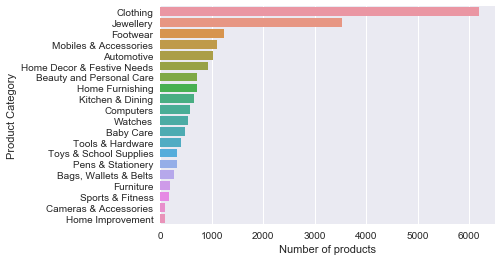

In [20]:
# product category vs product count

sns.barplot(data=groupby_df.sort_values(["primary_category_count"], ascending=False),
            y="primary_category", x = "primary_category_count")
plt.xlabel("Number of products")
plt.ylabel("Product Category")

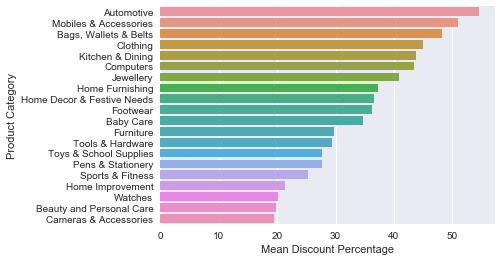

In [21]:
# product category vs category discounts

sns.barplot(data=groupby_df.sort_values(by = ["discount_percent_mean"], ascending=False),
            y="primary_category", x = "discount_percent_mean")
plt.xlabel("Mean Discount Percentage")
plt.ylabel("Product Category")

In [ ]:
#The above plot does not tell us about the variance of the discount_percent of different products withing a product category. 
#Let's plot a violinplot to see the discount_percent in a more comprehensive way. We will subset the original dataframe 
#such that it only contains the top 20 occurring categories (categories from the groupby_df).

In [22]:
def is_top_category(x):
    """return 1 if x is one of the top categories"""
    if x in list(groupby_df.primary_category):
        return 1
    else:
        return 0
    
df["is_top_category"] = df.primary_category.apply(is_top_category)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

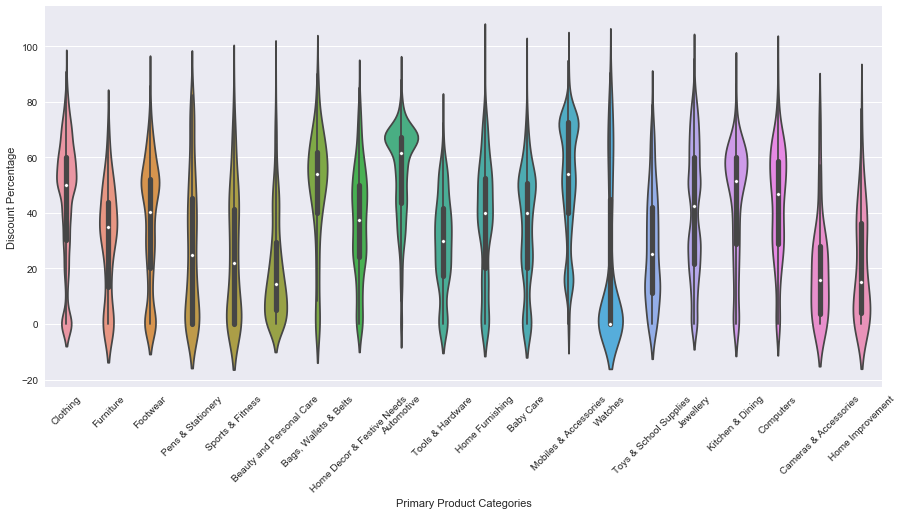

In [23]:
# subset df such that it only contains top 20 occurring categories
top_categories = df[df.is_top_category == 1]

plt.figure(figsize = [15,7])
sns.violinplot(data=top_categories, x = "primary_category", y = "discount_percent")
plt.ylabel("Discount Percentage")
plt.xlabel("Primary Product Categories")
plt.xticks(rotation=45)

In [ ]:
#The above plot gives a good idea of the discounts available across different products withing each category. 
#You can play around and analyse the secondary and tertiary categories as well!